In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
dataset=pd.read_csv('../dirty_dataset.csv')
dataset.shape

(55, 9)

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       55 non-null     object 
 1   Name              55 non-null     object 
 2   Email             47 non-null     object 
 3   Purchase_Amount   42 non-null     float64
 4   Purchase_Date     48 non-null     object 
 5   Product_Category  55 non-null     object 
 6   Quantity          45 non-null     object 
 7   Discount_Applied  44 non-null     object 
 8   Store_Location    55 non-null     object 
dtypes: float64(1), object(8)
memory usage: 4.0+ KB


In [41]:
dataset.isnull().sum()

Customer_ID          0
Name                 0
Email                8
Purchase_Amount     13
Purchase_Date        7
Product_Category     0
Quantity            10
Discount_Applied    11
Store_Location       0
dtype: int64

In [42]:
dataset.head(5)

,Customer_ID,Name,Email,Purchase_Amount,Purchase_Date,Product_Category,Quantity,Discount_Applied,Store_Location
0,c001,John Doe,john.doe@email.com,2000.0,2024-01-01,Electronics,NaN,no,New York
1,C001,Jane Smith,jane.smith@email.com,100.0,01/02/2024,Clothing,2,True,Los Angeles
2,C001,JANE SMITH,jane.smith@EMAIL.com,-10.0,2024-01-03,clothing,two,no,los angeles
3,c001,Mike Brown,mikebrown@email.com,NaN,2024-01-04,Furniture,two,False,Chicago
4,C003,mike brown,NaN,2000.0,01-05-2024,FURNITURE,two,True,CHICAGO


In [43]:
dataset.describe()

,Purchase_Amount
count,42.000000
mean,525.476190
std,818.851672
min,-10.000000
25%,12.500000
50%,50.000000
75%,1000.000000
max,2000.000000


## Finding the outliers in the 'Quality of Sleep' Column

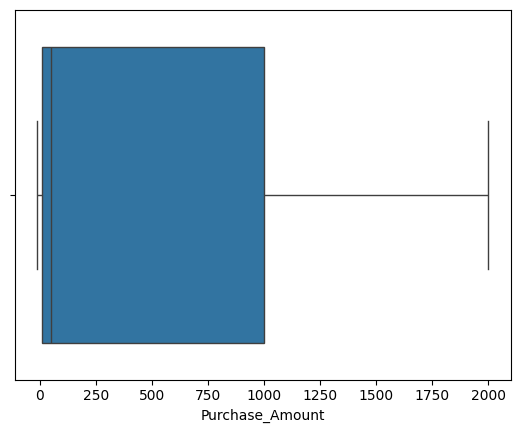

In [46]:
sns.boxplot(x='Purchase_Amount',data=dataset)
plt.show()

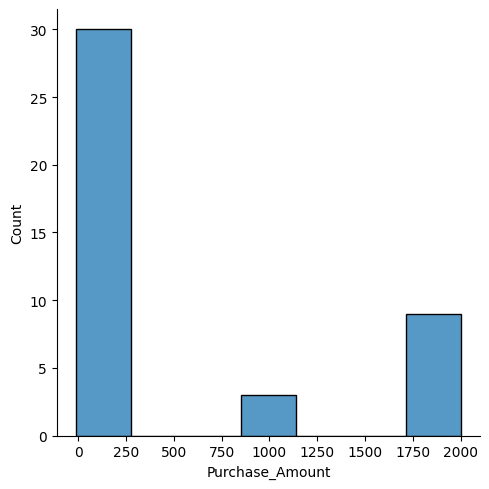

In [48]:
sns.displot(dataset['Purchase_Amount'])
plt.show()

In [51]:
dataset2=pd.read_csv('../covid.csv')
dataset2.shape



(472560, 8)

In [63]:
dataset2.describe()

,Cumulative_cases,Cumulative_deaths
count,4.725600e+05,4.725600e+05
mean,2.001990e+06,2.139459e+04
std,8.405211e+06,8.597986e+04
min,0.000000e+00,0.000000e+00
25%,6.265000e+03,3.800000e+01
50%,5.714900e+04,6.810000e+02
75%,6.432410e+05,7.693000e+03
max,1.034368e+08,1.224213e+06


In [62]:
dataset2.isnull().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
Cumulative_cases     0
Cumulative_deaths    0
dtype: int64

In [61]:
dataset2.drop(columns=['New_deaths','New_cases'],inplace=True)

## Visual Method to Find the Outliers

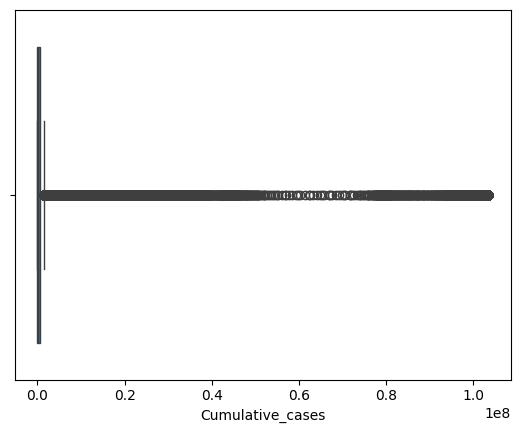

In [66]:
sns.boxplot(x='Cumulative_cases',data=dataset2)
plt.show()

## IQR : Statical method to Find the Outliers

In [80]:
q1=dataset2['Cumulative_cases'].quantile(0.25)
q3=dataset2['Cumulative_cases'].quantile(0.75)
iqr=q3-q1
iqr

np.float64(636976.0)

In [72]:
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)
min_range,max_range


(np.float64(-949199.0), np.float64(1598705.0))

## Removing the Outliers

In [78]:
new_dataset2=dataset2[dataset2['Cumulative_cases']<=max_range]
new_dataset2.shape

(402919, 6)

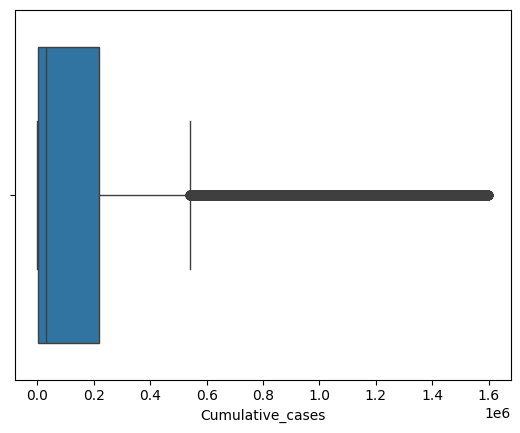

In [82]:
sns.boxplot(x='Cumulative_cases',data=new_dataset2)
plt.show()

## Z - Score method to find the Outliers

In [84]:
z_score=(dataset2['Cumulative_cases']-dataset2['Cumulative_cases'].mean())/(dataset2['Cumulative_cases'].std())
z_score

0        -0.238184
1        -0.238184
2        -0.238184
3        -0.238184
4        -0.238184
            ...   
472555    0.668695
472556   -0.230583
472557   -0.234235
472558   -0.208289
472559   -0.228642
Name: Cumulative_cases, Length: 472560, dtype: float64

In [86]:
dataset2['z_score']=z_score
dataset2.head(5)

,Date_reported,Country_code,Country,WHO_region,Cumulative_cases,Cumulative_deaths,z_score
0,2020-01-04,VC,Saint Vincent and the Grenadines,AMR,0,0,-0.238184
1,2020-01-04,SN,Senegal,AFR,0,0,-0.238184
2,2020-01-04,SB,Solomon Islands,WPR,0,0,-0.238184
3,2020-01-04,LK,Sri Lanka,SEAR,0,0,-0.238184
4,2020-01-04,SY,Syrian Arab Republic,EMR,0,0,-0.238184


In [89]:
new_z_dataset=dataset2[dataset2['z_score']<3]
new_z_dataset.shape

(463458, 7)

In [91]:
min=dataset2['Cumulative_cases'].mean()-(3*dataset2['Cumulative_cases'].std())
max=dataset2['Cumulative_cases'].mean()+(3*dataset2['Cumulative_cases'].std())
min,max

(np.float64(-23213642.388050284), np.float64(27217621.628206033))

In [93]:
direct_newdataset=dataset2[dataset2['Cumulative_cases']<=max_range]
direct_newdataset.shape

(402919, 7)

In [111]:
my_dataset=pd.read_csv('../movies.csv')
my_dataset.shape
my_dataset.head(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN


In [99]:
(my_dataset.isnull().sum())/(my_dataset.shape[0])*100

MOVIES       0.000000
YEAR         6.440644
GENRE        0.800080
RATING      18.201820
ONE-LINE     0.000000
STARS        0.000000
VOTES       18.201820
RunTime     29.582958
Gross       95.399540
dtype: float64

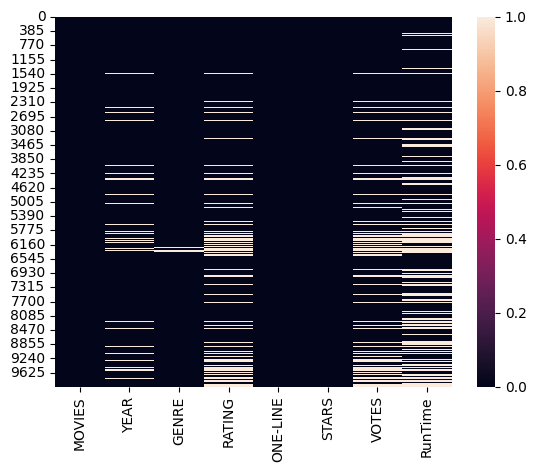

In [107]:
sns.heatmap(my_dataset.isnull())
plt.show()

In [109]:
my_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
dtypes: float64(2), object(6)
memory usage: 625.1+ KB


<Axes: xlabel='RunTime'>

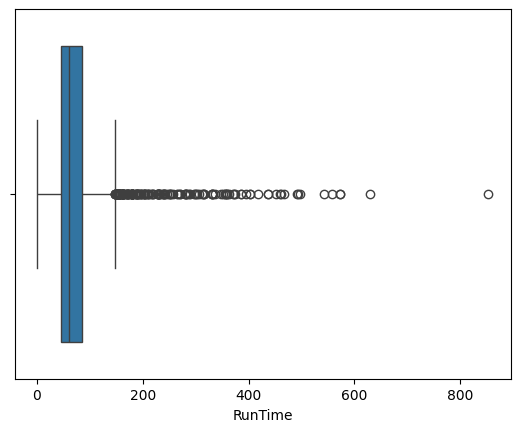

In [123]:
sns.boxplot(x='RunTime',data=my_dataset)

In [118]:
my_dataset.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [121]:
my_dataset['RunTime'].fillna(my_dataset['RunTime'].median())


0       121.0
1        25.0
2        44.0
3        23.0
4        60.0
        ...  
9994     60.0
9995     60.0
9996     60.0
9997     60.0
9998     60.0
Name: RunTime, Length: 9999, dtype: float64

In [125]:
my_dataset.isnull().sum()


MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime        0
Gross       9539
dtype: int64

<Axes: >

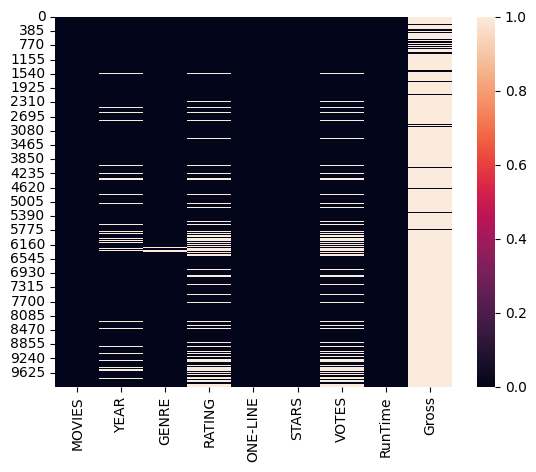

In [127]:
sns.heatmap(my_dataset.isnull())

<Axes: xlabel='VOTES'>

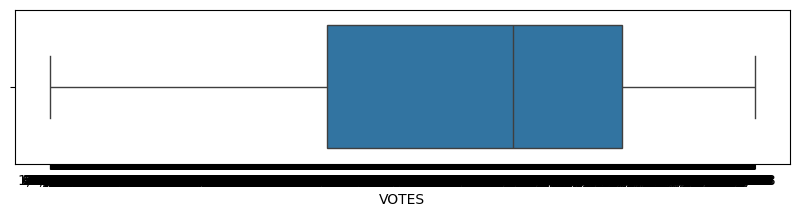

In [142]:
plt.figure(figsize=(10,2))
sns.boxplot(x='VOTES',data=my_dataset)

In [146]:
my_dataset.describe()
my_dataset.head(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,60.0
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0


In [150]:
my_dataset['VOTES'].fillna(my_dataset['VOTES'].mode()[0],inplace=True)
my_dataset.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES          0
RunTime        0
dtype: int64

<Axes: >

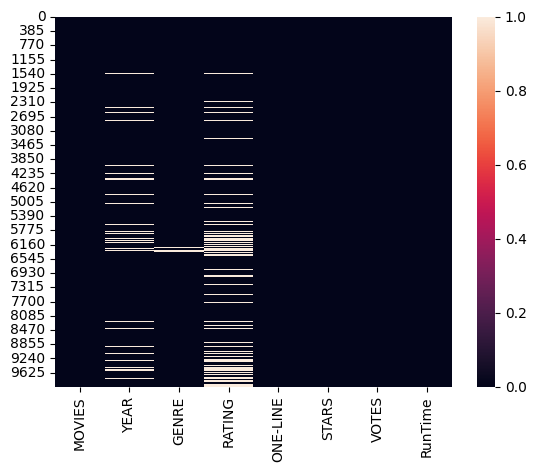

In [152]:
sns.heatmap(my_dataset.isnull())

In [156]:
my_dataset.describe()

,RATING,RunTime
count,8179.000000,9999.000000
mean,6.921176,66.118212
std,1.220232,39.853505
min,1.100000,1.000000
25%,6.200000,45.000000
50%,7.100000,60.000000
75%,7.800000,86.000000
max,9.900000,853.000000


<Axes: xlabel='RATING'>

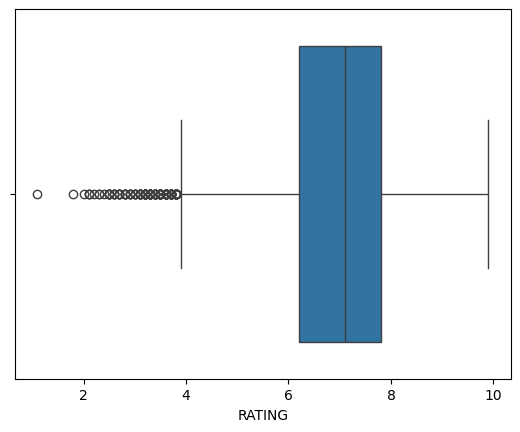

In [157]:
sns.boxplot(x='RATING',data=my_dataset)

In [160]:
my_dataset['RATING'].fillna(my_dataset['RATING'].mean())
my_dataset.isnull().sum()

MOVIES        0
YEAR        644
GENRE        80
RATING        0
ONE-LINE      0
STARS         0
VOTES         0
RunTime       0
dtype: int64

<Axes: >

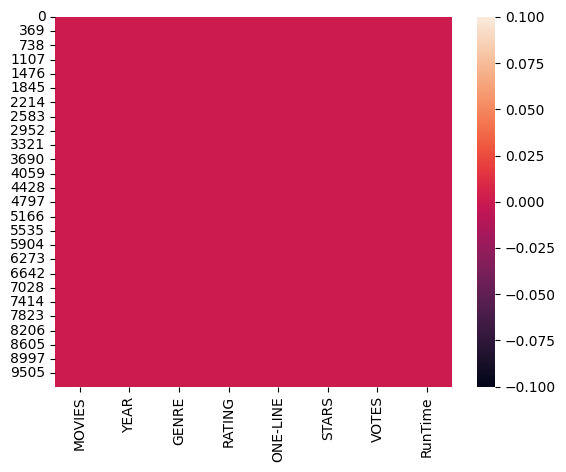

In [181]:
sns.heatmap(my_dataset.isnull())

In [168]:
my_dataset['YEAR'].fillna(my_dataset['YEAR'].mode()[0],inplace=True)


In [171]:
my_dataset.isnull().sum().sum()

np.int64(0)

In [176]:
my_dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9994     True
9995    False
9996    False
9997    False
9998    False
Length: 9999, dtype: bool

In [182]:
my_dataset.duplicated().sum()
my_dataset.drop_duplicates(inplace=True)
my_dataset.duplicated().sum()

np.int64(0)

## Standarization (z-score scaling)

In [186]:
my_dataset.head(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.100000,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.000000,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.200000,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.200000,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",6.921176,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,7,60.0
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.600000,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.800000,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.600000,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0
8,Never Have I Ever,(2020– ),\nComedy,7.900000,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0
9,Virgin River,(2019– ),"\nDrama, Romance",7.400000,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0


In [187]:
my_dataset.describe()

,RATING,RunTime
count,9568.000000,9568.000000
mean,6.919915,66.499791
std,1.127178,40.652103
min,1.100000,1.000000
25%,6.400000,45.000000
50%,6.921176,60.000000
75%,7.600000,87.000000
max,9.900000,853.000000


/var/folders/34/3wp7qxj90gb3d60ymvblmvt80000gn/T/ipykernel_30979/4251149630.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(my_dataset['RunTime'])


<Axes: xlabel='RunTime', ylabel='Density'>

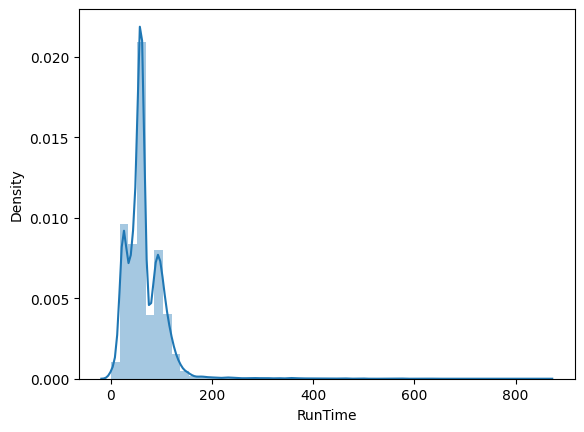

In [193]:
sns.distplot(my_dataset['RunTime'])

In [197]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(my_dataset[["RunTime"]])
scaler.transform(my_dataset[["RunTime"]])
my_dataset['RunTime_Scaler']=scaler.transform(my_dataset[["RunTime"]])
my_dataset.head(5)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,RunTime_Scaler
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.100000,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,1.340719
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.000000,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,-1.020906
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.200000,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,-0.553501
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.200000,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,-1.070106
4,Army of Thieves,(2021),"\nAction, Crime, Horror",6.921176,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,7,60.0,-0.159897


/var/folders/34/3wp7qxj90gb3d60ymvblmvt80000gn/T/ipykernel_30979/3047236438.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(my_dataset['RunTime_Scaler'])


<Axes: xlabel='RunTime_Scaler', ylabel='Density'>

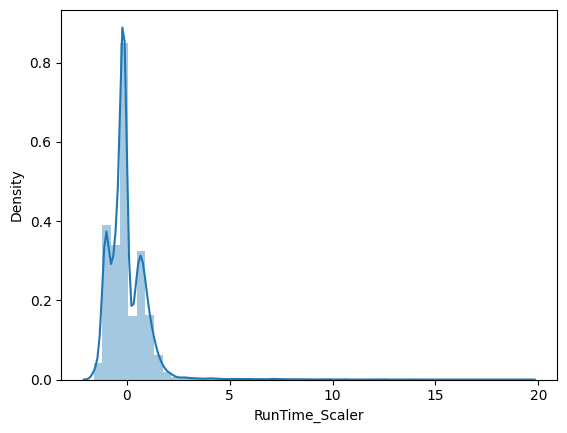

In [198]:
sns.distplot(my_dataset['RunTime_Scaler'])